In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv('Position_Salaries.csv')

In [55]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [56]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [57]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# creating an svr


1.   choose kernel and it's params as well as any regularization
  *   gaussian - popular
  *   regularization
  *   noise
2.   form correlation matrix
3.   train, to obtain contraction coefficients
4.   use those coefficients, create your estimator





In [58]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler_y = StandardScaler()
y = np.array(y).reshape((-1,1))
y = scaler_y.fit_transform(y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [60]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y.reshape(-1,))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0,0.5,'salary')

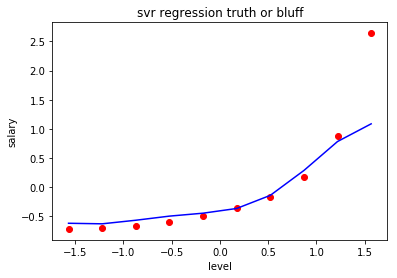

In [62]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('svr regression truth or bluff')
plt.xlabel('level')
plt.ylabel('salary')

In [63]:
y_pred = scaler_y.inverse_transform(regressor.predict(scaler.transform(np.array([[6.5]]))))

In [64]:
y_pred

array([170370.0204065])